#Data Insights


In [ ]:
import pandas as pd

In [ ]:
path = "./9.xlsx"
df = pd.read_excel(path)
print(df.head())

   Team Display Name           Athlete       Date             Opponet  PTS  \
0  Providence Friars      Alyssa Geary 2020-11-25  Quinnipiac Bobcats   17   
1  Providence Friars  Mary Baskerville 2020-11-25  Quinnipiac Bobcats   15   
2  Providence Friars    Olivia Orlando 2020-11-25  Quinnipiac Bobcats    5   
3  Providence Friars       Kyra Spiwak 2020-11-25  Quinnipiac Bobcats   14   
4  Providence Friars  Chanell Williams 2020-11-25  Quinnipiac Bobcats    8   

   MIN  FGM  FGA  PM  PA  ...  DREB  REB  AST  BLK  STL  TO  PF  Team Score  \
0   38    7   17   0   2  ...     3    5    4    3    1   4   5          65   
1   15    7   12   0   0  ...     7    9    2    1    1   2   4          65   
2   38    1    4   0   0  ...     6    9    0    0    2   1   2          65   
3   36    4   11   2   8  ...     3    3    3    0    0   0   1          65   
4   26    2    7   0   0  ...     2    3    3    0    0   2   3          65   

     Win  Game Score  
0  False         9.7  
1  False  

In [ ]:
unique_players = df['Athlete'].unique()
print(unique_players.size)
print(unique_players)

3002
['Alyssa Geary' 'Mary Baskerville' 'Olivia Orlando' ...
 'Julianna LaMendola' 'Lenee Beaumont' 'Henna Sandvik']


In [ ]:
unique_teams = df['Team Display Name'].unique()
print(unique_teams.size)

179


In [ ]:
total_games_played = df.groupby("Athlete")["Athlete"].count()
total_wins = df.groupby("Athlete")["Win"].sum()

win_percentage = (total_wins / total_games_played) * 100
print(win_percentage.sort_values(ascending=False).head(10))

Athlete
Zoli Khalil       100.0
A'Jah Davis       100.0
Zoesha Smith      100.0
A'Riana Gray      100.0
A'riel Jackson    100.0
AJ Marotte        100.0
Zakia Rasheed     100.0
Zaida Gonzalez    100.0
Zahirah Walton    100.0
Yonta Vaughn      100.0
dtype: float64


In [ ]:
print(win_percentage.sort_values(ascending=True).head(10))

Athlete
Lexi Green             0.0
Jayleen Valero         0.0
Sophie Benharouga      0.0
Ashley Norling         0.0
Irene Primo            0.0
Rosie Jennings         0.0
Cassidy Crawford       0.0
Casey O'Shaughnessy    0.0
Casey Miller           0.0
Caroline de Klauman    0.0
dtype: float64


In [ ]:
total_games_played

,Athlete
Athlete,
A'Jah Davis,3
A'Moni Waiters,1
A'Riana Gray,1
A'riel Jackson,1
AJ Marotte,1
...,...
Zoee Hache,72
Zoesha Smith,1
Zoey Ward,29


In [ ]:
print(df[df["Athlete"] == "A'Riana Gray"])

               Team Display Name       Athlete       Date  \
5083  West Virginia Mountaineers  A'Riana Gray 2021-11-16   

                         Opponet  PTS  MIN  FGM  FGA  PM  PA  ...  DREB  REB  \
5083  St. Francis (PA) Red Flash    0    4    0    2   0   0  ...     0    1   

      AST  BLK  STL  TO  PF  Team Score   Win  Game Score  
5083    0    0    0   3   5          86  True        -5.7  

[1 rows x 23 columns]


In [ ]:
count = (total_games_played >= 5).sum()
print(count)

934


In [ ]:
columns_to_sum = ["PTS", "MIN", "FGM", "FGA", "PM", "PA", "FTM", "FTA",
                  "OREB", "DREB", "REB", "AST", "BLK", "STL", "TO", "PF",
                  "Team Score", "Win", "Game Score"]

athlete_summary = df.groupby("Athlete")[columns_to_sum].sum().reset_index()

athlete_summary["Matches Played"] = df.groupby("Athlete")["Athlete"].count().values

print(athlete_summary.head())

          Athlete  PTS  MIN  FGM  FGA  PM  PA  FTM  FTA  OREB  ...  REB  AST  \
0     A'Jah Davis   18   74    9   19   0   0    0    0     7  ...   22    4   
1  A'Moni Waiters    0    0    0    0   0   0    0    0     0  ...    0    0   
2    A'Riana Gray    0    4    0    2   0   0    0    0     1  ...    1    0   
3  A'riel Jackson    6   19    2    5   0   0    2    2     1  ...    1    3   
4      AJ Marotte    6   18    2    6   0   1    2    2     0  ...    0    0   

   BLK  STL  TO  PF  Team Score  Win  Game Score  Matches Played  
0    2    0   6   4         219    3        14.3               3  
1    0    0   0   0          55    0         0.0               1  
2    0    0   3   5          86    1        -5.7               1  
3    0    0   4   2          71    1         1.3               1  
4    0    2   0   0          72    1         4.6               1  

[5 rows x 21 columns]


In [ ]:
athlete_summary[athlete_summary['MIN']/athlete_summary['Matches Played'] < 10].count()

,0
Athlete,717
PTS,717
MIN,717
FGM,717
FGA,717
PM,717
PA,717
FTM,717
FTA,717
OREB,717


In [ ]:
athlete_summary.to_csv('Athlete_Summary.csv')

In [ ]:
team_summary = df.groupby("Team Display Name")[columns_to_sum].sum().reset_index()

team_summary["Matches Played"] = df.groupby("Team Display Name")["Team Display Name"].count().values

team_summary["Win Rate"] = (team_summary["Win"] / team_summary["Matches Played"]) * 100
print(win_percentage.sort_values(ascending=False).head(10))

print(team_summary.head())

Athlete
Zoli Khalil       100.0
A'Jah Davis       100.0
Zoesha Smith      100.0
A'Riana Gray      100.0
A'riel Jackson    100.0
AJ Marotte        100.0
Zakia Rasheed     100.0
Zaida Gonzalez    100.0
Zahirah Walton    100.0
Yonta Vaughn      100.0
dtype: float64
            Team Display Name  PTS   MIN  FGM  FGA  PM   PA  FTM  FTA  OREB  \
0                  Akron Zips   53   200   19   57   1   13   14   20     8   
1  American University Eagles  163   600   56  162  17   59   34   50    28   
2    Arizona State Sun Devils   82   200   30   64  13   31    9   13    16   
3            Arizona Wildcats   78   200   31   66  11   24    5    9    18   
4          Army Black Knights  824  2600  285  775  88  290  166  247   164   

   ...  AST  BLK  STL   TO   PF  Team Score  Win  Game Score  Matches Played  \
0  ...    9    5   11   10    7         424    8        38.2               8   
1  ...   33    2   29   51   64        1838   22        83.4              34   
2  ...   20    5   13 

In [ ]:
team_summary.shape

(179, 22)

In [ ]:
team_summary.to_csv('Team_Summary.csv')

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = "/content/Athlete_Summary.csv"
df = pd.read_csv(file_path)

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_cols] = scaler_minmax.fit_transform(df_minmax[num_cols])

df_minmax.to_csv("Athlete_Summary_MinMax.csv")

In [ ]:
df_minmax.head()

,Unnamed: 0,Athlete,PTS,MIN,FGM,FGA,PM,PA,FTM,FTA,...,REB,AST,BLK,STL,TO,PF,Team Score,Win,Game Score,Matches Played
0,0.000000,A'Jah Davis,0.012950,0.017823,0.018672,0.014482,0.0,0.000000,0.000000,0.00000,...,0.030641,0.010336,0.014925,0.000000,0.015385,0.012698,0.026797,0.038961,0.037409,0.017094
1,0.000333,A'Moni Waiters,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005359,0.000000,0.024233,0.000000
2,0.000666,A'Riana Gray,0.000000,0.000963,0.000000,0.001524,0.0,0.000000,0.000000,0.00000,...,0.001393,0.000000,0.000000,0.000000,0.007692,0.015873,0.009412,0.012987,0.018981,0.000000
3,0.001000,A'riel Jackson,0.004317,0.004576,0.004149,0.003811,0.0,0.000000,0.006601,0.00432,...,0.001393,0.007752,0.000000,0.000000,0.010256,0.006349,0.007451,0.012987,0.025431,0.000000
4,0.001333,AJ Marotte,0.004317,0.004335,0.004149,0.004573,0.0,0.001427,0.006601,0.00432,...,0.000000,0.000000,0.000000,0.006579,0.000000,0.000000,0.007582,0.012987,0.028471,0.000000


In [ ]:
athlete_summary.sort_values(by="Game Score", ascending=False).head(10)

,Athlete,PTS,MIN,FGM,FGA,PM,PA,FTM,FTA,OREB,...,REB,AST,BLK,STL,TO,PF,Team Score,Win,Game Score,Matches Played
2330,Ny'Ceara Pryor,1222,2218,454,1013,27,136,287,413,137,...,462,297,14,237,162,178,4298,43,1059.0,67
10,Aaliyah Parker,1202,2179,453,1040,41,178,255,336,233,...,566,155,43,267,233,299,6117,50,938.8,88
248,Angel Parker,1390,2662,482,1312,125,428,301,437,93,...,386,387,21,304,390,243,6481,54,865.4,94
1397,Juana Camilion,1015,2514,386,903,93,314,150,190,77,...,408,266,50,180,230,213,4420,43,760.5,75
1260,Janelle Brown,956,2134,339,699,84,217,194,259,100,...,391,271,16,203,280,275,6807,77,747.5,105
1300,Jayme DeCesare,978,3477,318,908,154,490,188,240,100,...,471,355,9,108,201,180,6332,41,719.9,102
1896,Mackenzie DeWees,751,1918,279,623,21,68,172,259,166,...,433,161,8,171,120,96,4107,43,718.9,63
749,Dee Dee Davis,1332,2579,457,1255,115,387,303,463,98,...,462,226,6,161,297,169,5134,47,708.9,83
1343,Jessica Tomasetti,1024,3198,384,930,98,296,158,198,134,...,436,194,10,113,183,169,6963,58,700.2,114
2168,Mikala Morris,909,2244,385,881,11,47,128,173,204,...,703,137,134,81,235,178,5133,52,685.3,80


In [ ]:
athlete_summary.head(10)

,Athlete,PTS,MIN,FGM,FGA,PM,PA,FTM,FTA,OREB,...,REB,AST,BLK,STL,TO,PF,Team Score,Win,Game Score,Matches Played
0,A'Jah Davis,18,74,9,19,0,0,0,0,7,...,22,4,2,0,6,4,219,3,14.3,3
1,A'Moni Waiters,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,55,0,0.0,1
2,A'Riana Gray,0,4,0,2,0,0,0,0,1,...,1,0,0,0,3,5,86,1,-5.7,1
3,A'riel Jackson,6,19,2,5,0,0,2,2,1,...,1,3,0,0,4,2,71,1,1.3,1
4,AJ Marotte,6,18,2,6,0,1,2,2,0,...,0,0,0,2,0,0,72,1,4.6,1
5,Aalia Carlson,5,6,2,3,1,2,0,0,0,...,0,0,0,0,2,2,71,0,0.9,1
6,Aaliyah Frazier,0,3,0,1,0,1,0,0,0,...,0,0,0,1,1,0,58,1,-0.7,1
7,Aaliyah Gayles,0,12,0,4,0,3,0,2,1,...,1,2,0,1,4,1,93,1,-4.9,1
8,Aaliyah McQueen,4,5,2,3,0,1,0,0,3,...,3,2,0,0,0,1,77,1,5.8,1
9,Aaliyah Moore,405,1524,159,349,2,16,85,143,164,...,460,50,16,46,153,131,3285,17,291.5,61


# Attacking Score and Defending Score Calculation

In [ ]:
new_df = athlete_summary[['Athlete', 'Matches Played', 'Game Score']].copy()

new_df['Attacking Score'] = (athlete_summary['PTS'] + 0.4 * athlete_summary['FGM'] - 0.7 * athlete_summary['FGA'] - 0.4 * (athlete_summary['FTA'] - athlete_summary['FTM']) + 0.7 * athlete_summary['OREB'] + 0.7 * athlete_summary['AST'] - 0.4 * athlete_summary['PF'])
new_df['Defending Score'] = (0.3 * athlete_summary['DREB'] + 0.7 * athlete_summary['BLK'] + athlete_summary['STL'] - 0.4 * athlete_summary['PF'] -  athlete_summary['TO'])
print(new_df.head())

          Athlete  Matches Played  Game Score  Attacking Score  \
0     A'Jah Davis               3        14.3             14.4   
1  A'Moni Waiters               1         0.0              0.0   
2    A'Riana Gray               1        -5.7             -2.7   
3  A'riel Jackson               1         1.3              5.3   
4      AJ Marotte               1         4.6              2.6   

   Defending Score  
0             -1.7  
1              0.0  
2             -5.0  
3             -4.8  
4              2.0  


In [ ]:
new_df.head()

,Athlete,Matches Played,Game Score,Attacking Score,Defending Score
0,A'Jah Davis,3,14.3,14.4,-1.7
1,A'Moni Waiters,1,0.0,0.0,0.0
2,A'Riana Gray,1,-5.7,-2.7,-5.0
3,A'riel Jackson,1,1.3,5.3,-4.8
4,AJ Marotte,1,4.6,2.6,2.0


In [ ]:
athlete_summary.set_index("Athlete", inplace=True)
athlete_summary.loc["A'Jah Davis"]

,A'Jah Davis
PTS,18.0
MIN,74.0
FGM,9.0
FGA,19.0
PM,0.0
PA,0.0
FTM,0.0
FTA,0.0
OREB,7.0
DREB,15.0


In [ ]:
new_df.sort_values(by="Attacking Score", ascending=False).head(20)

,Athlete,Matches Played,Game Score,Attacking Score,Defending Score
2330,Ny'Ceara Pryor,67,1059.0,876.7,111.1
248,Angel Parker,94,865.4,848.8,-80.6
10,Aaliyah Parker,88,938.8,774.8,44.4
749,Dee Dee Davis,83,708.9,731.5,-90.2
1260,Janelle Brown,105,747.5,726.0,-88.5
1300,Jayme DeCesare,102,719.9,695.3,-47.4
1979,Makayla Firebaugh,114,641.8,685.8,-140.8
1397,Juana Camilion,75,760.5,676.2,-0.9
1343,Jessica Tomasetti,114,700.2,672.6,-40.0
636,Chloe Wilson,79,594.8,656.6,-157.0


In [ ]:
new_df.sort_values(by="Defending Score", ascending=False).head(20)

,Athlete,Matches Played,Game Score,Attacking Score,Defending Score
2330,Ny'Ceara Pryor,67,1059.0,876.7,111.1
1896,Mackenzie DeWees,63,718.9,582.2,98.3
693,Courtney Warley,47,528.6,408.8,78.2
282,Anna Ekerstedt,51,177.5,104.8,47.5
1885,Lytoya Baker,33,371.5,303.8,44.9
10,Aaliyah Parker,88,938.8,774.8,44.4
510,Caitlin Weimar,23,207.8,152.0,39.8
1189,Jada Dapaa,56,493.5,411.6,37.9
1246,Jamey Napoleon,17,108.1,55.3,37.6
2120,Meghan Andersen,33,407.7,350.1,31.2


# EDA Analysis



*   Model Building
*   Analysis
*   Handling Missing Values
*   Detecting Outliers



In [ ]:
df.to_csv('9.csv')

Basic Information:
Dataset shape: (3002, 23)

Data types:
Unnamed: 0.1        int64
Unnamed: 0          int64
Athlete            object
PTS                 int64
MIN                 int64
FGM                 int64
FGA                 int64
PM                  int64
PA                  int64
FTM                 int64
FTA                 int64
OREB                int64
DREB                int64
REB                 int64
AST                 int64
BLK                 int64
STL                 int64
TO                  int64
PF                  int64
Team Score          int64
Win                 int64
Game Score        float64
Matches Played      int64
dtype: object

Summary statistics:
       Unnamed: 0.1  Unnamed: 0          PTS          MIN          FGM  \
count    3002.00000  3002.00000  3002.000000  3002.000000  3002.000000   
mean     1500.50000  1500.50000    57.569287   189.412725    21.143238   
std       866.74708   866.74708   139.312727   421.220045    50.869633   
min         0

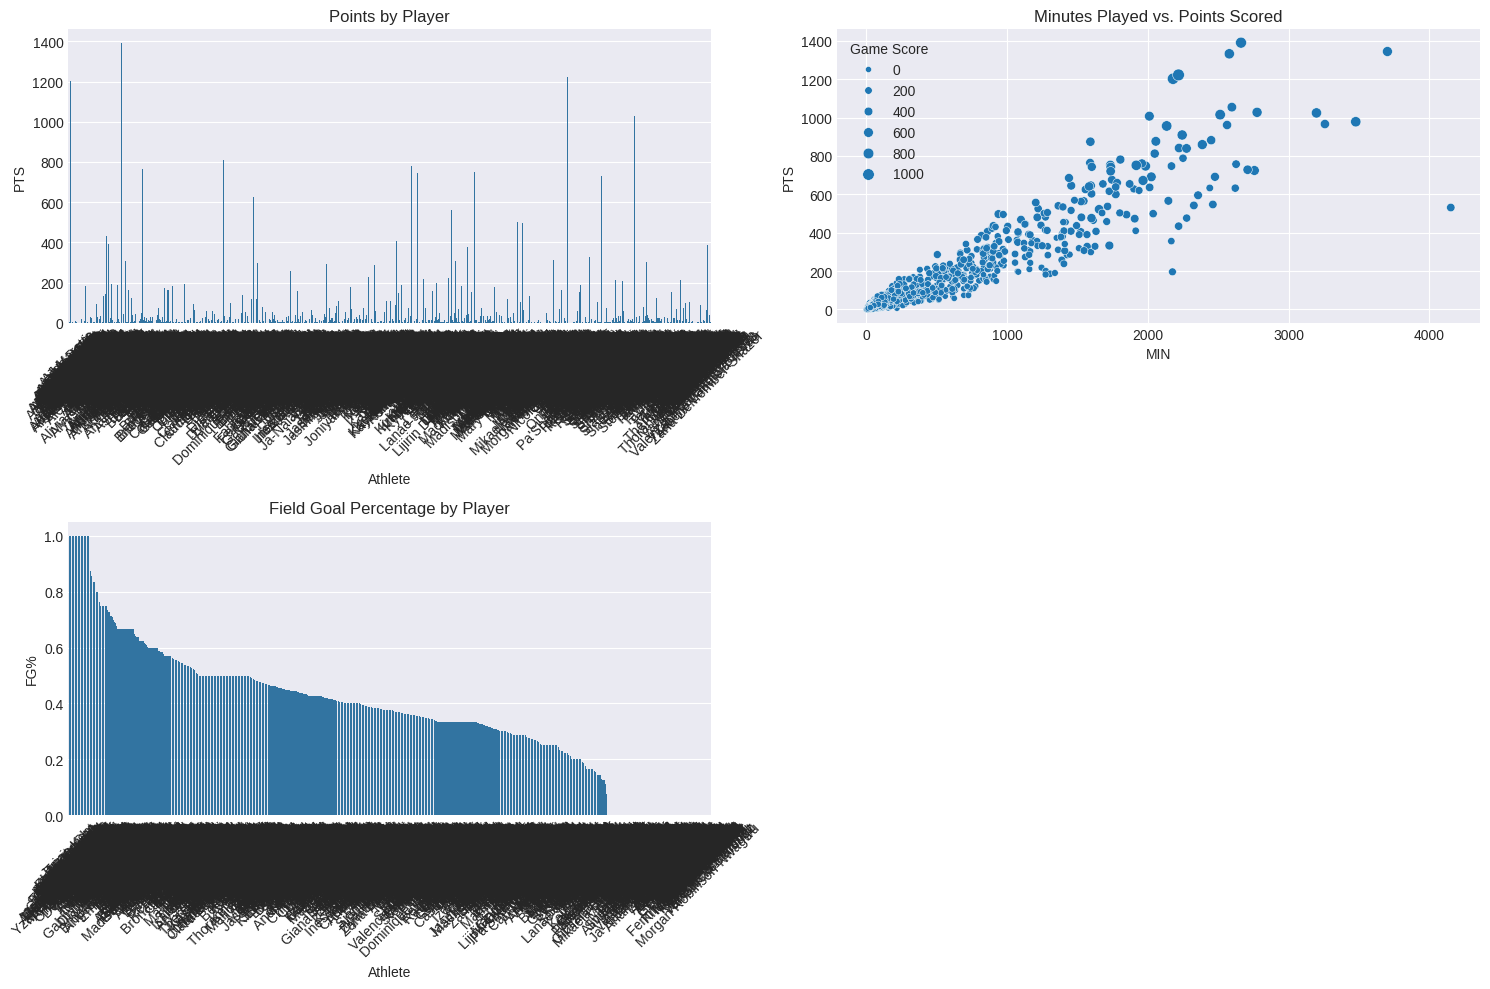

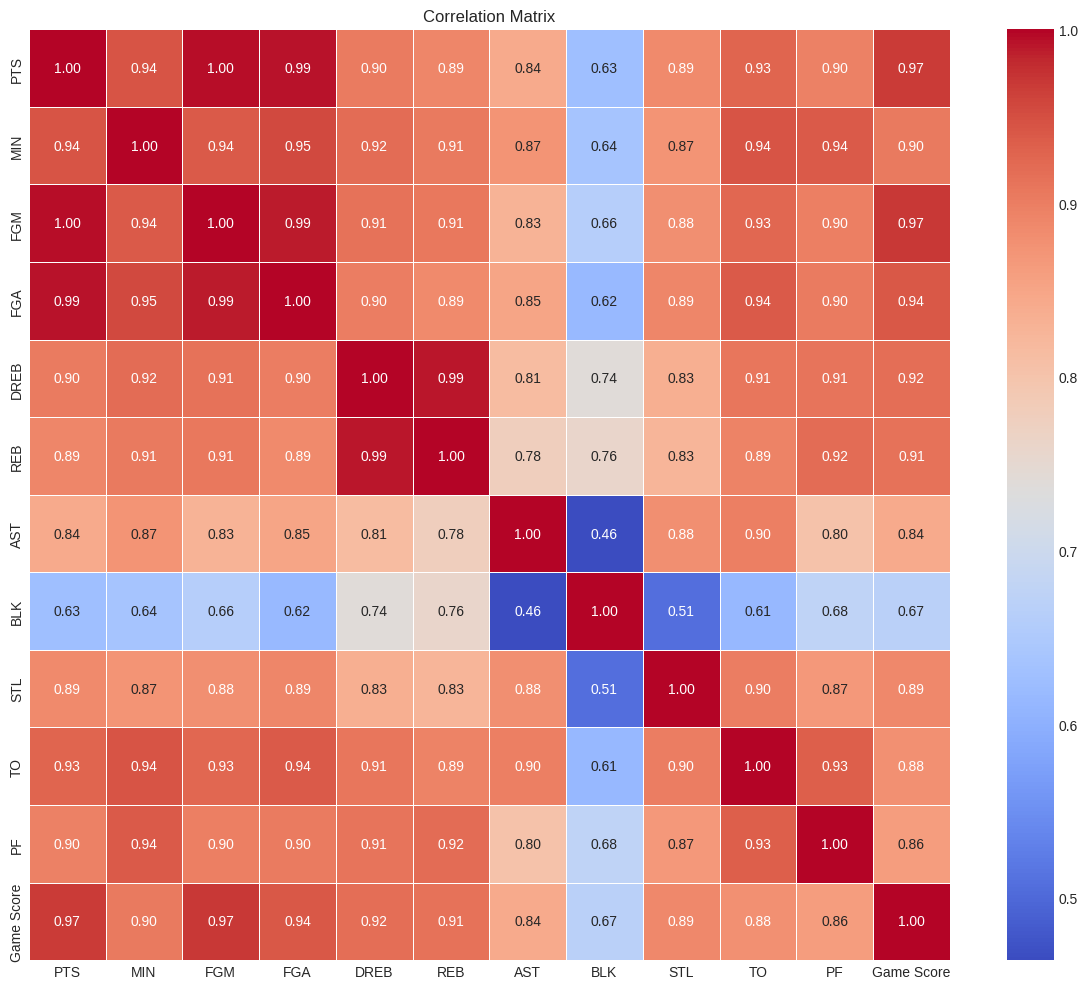

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


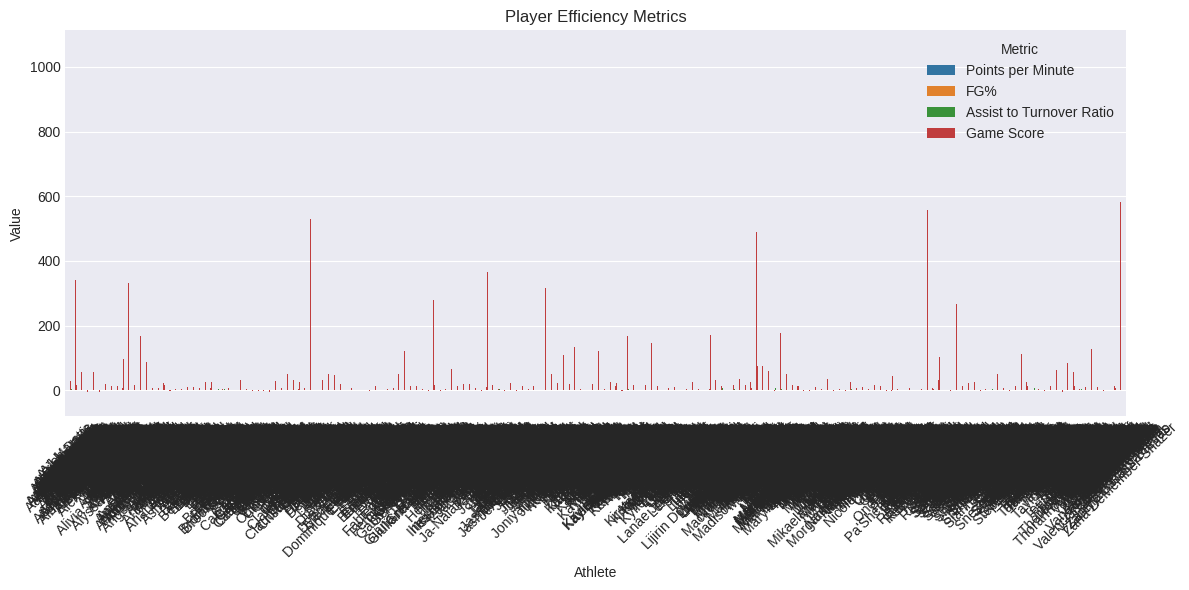


Player Summary Statistics:
                     PTS  REB  AST  BLK  STL   TO   MIN  Game Score       FG%
Athlete                                                                      
Ny'Ceara Pryor      1222  462  297   14  237  162  2218      1059.0  0.448174
Aaliyah Parker      1202  566  155   43  267  233  2179       938.8  0.435577
Angel Parker        1390  386  387   21  304  390  2662       865.4  0.367378
Juana Camilion      1015  408  266   50  180  230  2514       760.5  0.427464
Janelle Brown        956  391  271   16  203  280  2134       747.5  0.484979
...                  ...  ...  ...  ...  ...  ...   ...         ...       ...
Erin Harris           28   12   15    0   12   34   181       -14.9  0.210526
Destiny Jackson       27   24   13    0    7   25   273       -16.3  0.153846
Ramatoulaye Diallo     2    8    1    0    0   14    38       -16.8  0.000000
Emily O'Connell        4    5    2    0    1   14    79       -17.3  0.166667
Maddie Novak          29   30    2  

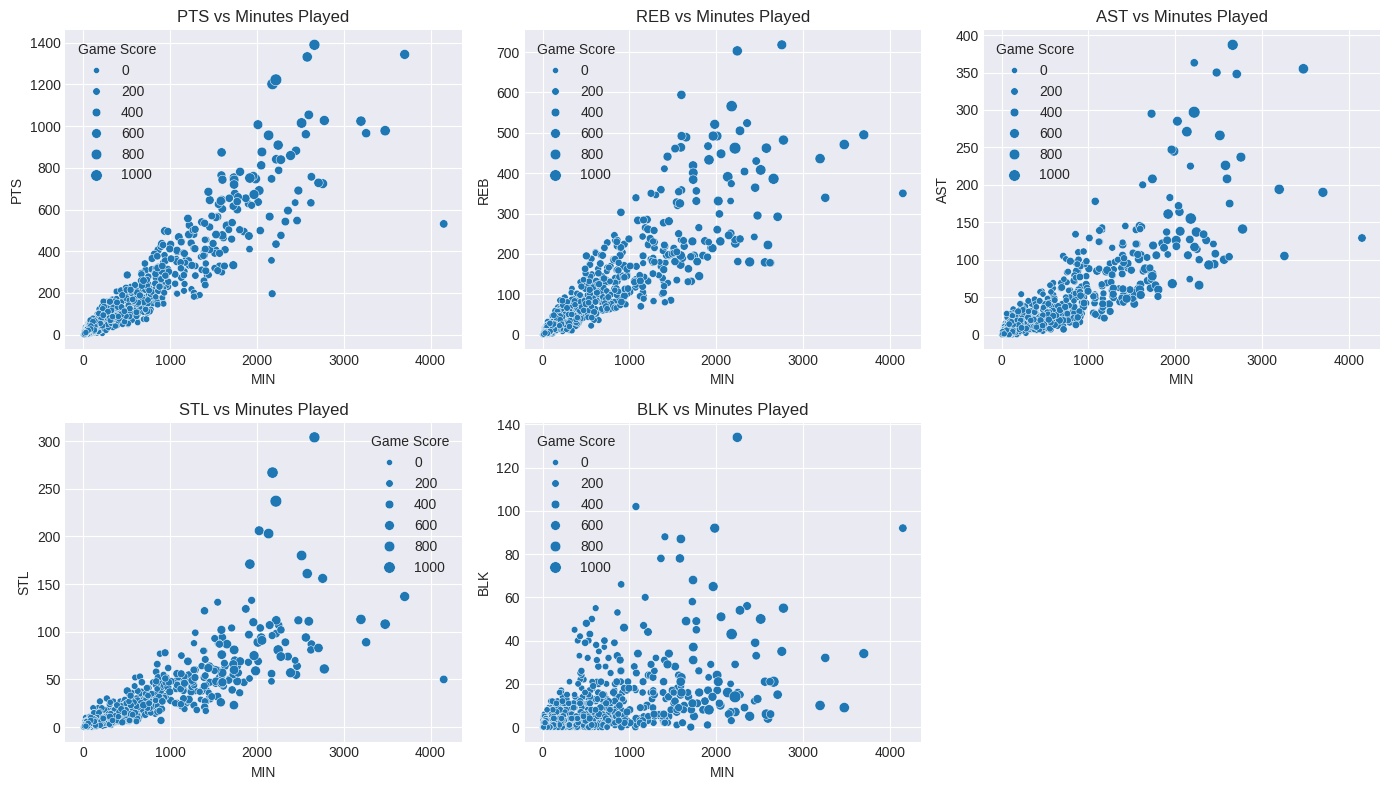

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('9.csv')

print("Basic Information:")
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

df['FG%'] = df['FGM'] / df['FGA']
df['3P%'] = df['PM'] / df['PA'].replace(0, np.nan)

df['Points per Minute'] = df['PTS'] / df['MIN']
df['Offensive Rebounds'] = df['REB'] - df['DREB']
df['Assist to Turnover Ratio'] = df['AST'] / df['TO'].replace(0, np.nan)


plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Athlete', y='PTS', data=df)
plt.title('Points by Player')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.scatterplot(x='MIN', y='PTS', size='Game Score', data=df)
plt.title('Minutes Played vs. Points Scored')

plt.subplot(2, 2, 3)
fg_data = df[['Athlete', 'FGM', 'FGA']].copy()
fg_data['FG%'] = df['FG%']
fg_data = fg_data.sort_values('FG%', ascending=False)
sns.barplot(x='Athlete', y='FG%', data=fg_data)
plt.title('Field Goal Percentage by Player')
plt.xticks(rotation=45)

best_player = df.loc[df['Game Score'].idxmax(), 'Athlete']
best_player_data = df[df['Athlete'] == best_player]

categories = ['PTS', 'REB', 'AST', 'BLK', 'STL', 'Game Score']
max_values = df[categories].max()
normalized_data = best_player_data[categories].iloc[0] / max_values

plt.tight_layout()
plt.savefig('basketball_eda.png')
plt.show()

numeric_cols = ['PTS', 'MIN', 'FGM', 'FGA', 'DREB', 'REB', 'AST', 'BLK', 'STL', 'TO', 'PF', 'Game Score']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

plt.figure(figsize=(12, 6))
efficiency = pd.melt(df, id_vars=['Athlete'], value_vars=['Points per Minute', 'FG%', 'Assist to Turnover Ratio', 'Game Score'],
                    var_name='Metric', value_name='Value')
sns.barplot(x='Athlete', y='Value', hue='Metric', data=efficiency)
plt.title('Player Efficiency Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('player_efficiency.png')
plt.show()

player_summary = df.groupby('Athlete').agg({
    'PTS': 'sum',
    'REB': 'sum',
    'AST': 'sum',
    'BLK': 'sum',
    'STL': 'sum',
    'TO': 'sum',
    'MIN': 'sum',
    'Game Score': 'mean',
    'FG%': 'mean'
}).sort_values('Game Score', ascending=False)

print("\nPlayer Summary Statistics:")
print(player_summary)

plt.figure(figsize=(14, 8))
metrics = ['PTS', 'REB', 'AST', 'STL', 'BLK']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x='MIN', y=metric, size='Game Score', data=df)
    plt.title(f'{metric} vs Minutes Played')

plt.tight_layout()
plt.savefig('performance_vs_minutes.png')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('9.xlsx')

# Clean column names
df.columns = [col.strip() for col in df.columns]
df.rename(columns={
    'Opponet': 'Opponent',
    'PM': '3PM',
    'PA': '3PA',
    'TO': 'TOV',
    'Team Display Name': 'Team',
    'Game Score': 'Game_Score'
}, inplace=True)

# Aggregate team stats per game
team_stats = df.groupby(['Date', 'Team']).agg({
    'MIN': 'sum', 'PTS': 'sum', 'FGM': 'sum', 'FGA': 'sum', '3PM': 'sum',
    'FTM': 'sum', 'FTA': 'sum', 'OREB': 'sum', 'DREB': 'sum', 'REB': 'sum',
    'AST': 'sum', 'TOV': 'sum', 'PF': 'sum', 'Team Score': 'mean'
}).rename(columns=lambda x: f'Team_{x}')

df = df.merge(team_stats, left_on=['Date', 'Team'], right_index=True)

# Estimate qAST
df['qAST'] = ((df['MIN'] / (df['Team_MIN'] / 5)) * (1.14 * ((df['Team_AST'] - df['AST']) / df['Team_FGM']))) + \
             ((((df['Team_AST'] / df['Team_MIN']) * df['MIN'] * 5 - df['AST']) /
               ((df['Team_FGM'] / df['Team_MIN']) * df['MIN'] * 5 - df['FGM'])) *
              (1 - (df['MIN'] / (df['Team_MIN'] / 5))))

# Offensive Rating
df['FG_Part'] = df['FGM'] * (1 - 0.5 * ((df['PTS'] - df['FTM']) / (2 * df['FGA'])) * df['qAST'])
df['AST_Part'] = 0.5 * (((df['Team_PTS'] - df['Team_FTM']) - (df['PTS'] - df['FTM'])) / (2 * (df['Team_FGA'] - df['FGA']))) * df['AST']
df['FT_Part'] = (1 - (1 - (df['FTM'] / df['FTA']))**2) * 0.4 * df['FTA']
df['Team_Scoring_Poss'] = df['Team_FGM'] + (1 - (1 - (df['Team_FTM'] / df['Team_FTA']))**2) * 0.4 * df['Team_FTA']
df['Team_ORB%'] = df['Team_OREB'] / (df['Team_OREB'] + (df['Team_REB'] - df['Team_OREB']))
df['Team_Play%'] = df['Team_Scoring_Poss'] / (df['Team_FGA'] + df['Team_FTA'] * 0.4 + df['Team_TOV'])
df['Team_ORB_Weight'] = ((1 - df['Team_ORB%']) * df['Team_Play%']) / (((1 - df['Team_ORB%']) * df['Team_Play%']) + (df['Team_ORB%'] * (1 - df['Team_Play%'])))
df['ORB_Part'] = df['OREB'] * df['Team_ORB_Weight'] * df['Team_Play%']
df['ScPoss'] = (df['FG_Part'] + df['AST_Part'] + df['FT_Part']) * (1 - (df['Team_OREB'] / df['Team_Scoring_Poss']) * df['Team_ORB_Weight'] * df['Team_Play%']) + df['ORB_Part']
df['FGxPoss'] = (df['FGA'] - df['FGM']) * (1 - 1.07 * df['Team_ORB%'])
df['FTxPoss'] = ((1 - (df['FTM'] / df['FTA']))**2) * 0.4 * df['FTA']
df['TotPoss'] = df['ScPoss'] + df['FGxPoss'] + df['FTxPoss'] + df['TOV']
df['PProd_FG_Part'] = 2 * (df['FGM'] + 0.5 * df['3PM']) * (1 - 0.5 * ((df['PTS'] - df['FTM']) / (2 * df['FGA'])) * df['qAST'])
df['PProd_AST_Part'] = 2 * ((df['Team_FGM'] - df['FGM'] + 0.5 * (df['Team_3PM'] - df['3PM'])) / (df['Team_FGM'] - df['FGM'])) * df['AST_Part']
df['PProd_ORB_Part'] = df['OREB'] * df['Team_ORB_Weight'] * df['Team_Play%'] * (df['Team_PTS'] / df['Team_Scoring_Poss'])
df['PProd'] = (df['PProd_FG_Part'] + df['PProd_AST_Part'] + df['FTM']) * (1 - (df['Team_OREB'] / df['Team_Scoring_Poss']) * df['Team_ORB_Weight'] * df['Team_Play%']) + df['PProd_ORB_Part']
df['ORtg'] = 100 * (df['PProd'] / df['TotPoss'])
df['Floor%'] = df['ScPoss'] / df['TotPoss']

# Defensive Rating
opp_stats = df.groupby(['Date', 'Opponent']).agg({
    'FGM': 'sum', 'FGA': 'sum', 'FTM': 'sum', 'FTA': 'sum', 'OREB': 'sum',
    'DREB': 'sum', 'REB': 'sum', 'AST': 'sum', 'STL': 'sum', 'BLK': 'sum',
    'TOV': 'sum', 'PF': 'sum', 'MIN': 'sum', 'PTS': 'sum'
}).rename(columns=lambda x: f'Opp_{x}')
df = df.merge(opp_stats, left_on=['Date', 'Team'], right_on=['Date', 'Opponent'])
df['DOR%'] = df['Opp_OREB'] / (df['Opp_OREB'] + df['Team_DREB'])
df['DFG%'] = df['Opp_FGM'] / df['Opp_FGA']
df['FMwt'] = (df['DFG%'] * (1 - df['DOR%'])) / ((df['DFG%'] * (1 - df['DOR%'])) + ((1 - df['DFG%']) * df['DOR%']))
df['Stops1'] = df['STL'] + df['BLK'] * df['FMwt'] * (1 - 1.07 * df['DOR%']) + df['DREB'] * (1 - df['FMwt'])
df['Stops2'] = (((df['Opp_FGA'] - df['Opp_FGM'] - df['BLK']) / df['Team_MIN']) * df['FMwt'] * (1 - 1.07 * df['DOR%']) +
                ((df['Opp_TOV'] - df['STL']) / df['Team_MIN'])) * df['MIN'] + \
               (df['PF'] / df['Team_PF']) * 0.4 * df['Opp_FTA'] * (1 - (df['Opp_FTM'] / df['Opp_FTA']))**2
df['Stops'] = df['Stops1'] + df['Stops2']
df['Team_Poss'] = df['Team_FGA'] + 0.4 * df['Team_FTA'] + df['Team_TOV']
df['Stop%'] = (df['Stops'] * df['Opp_MIN']) / (df['Team_Poss'] * df['MIN'])
df['Team_Def_Rtg'] = 100 * (df['Opp_PTS'] / df['Team_Poss'])
df['D_Pts_per_ScPoss'] = df['Opp_PTS'] / (df['Opp_FGM'] + (1 - (1 - (df['Opp_FTM'] / df['Opp_FTA']))**2) * 0.4 * df['Opp_FTA'])
df['DRtg'] = df['Team_Def_Rtg'] + 0.2 * (100 * df['D_Pts_per_ScPoss'] * (1 - df['Stop%']) - df['Team_Def_Rtg'])

# Output
print(df[['Date', 'Athlete', 'Team', 'Opponent', 'ORtg', 'DRtg', 'Floor%']].head())


        Date           Athlete               Team            Opponent  \
0 2020-11-25      Alyssa Geary  Providence Friars  Quinnipiac Bobcats   
1 2020-11-25  Mary Baskerville  Providence Friars  Quinnipiac Bobcats   
2 2020-11-25    Olivia Orlando  Providence Friars  Quinnipiac Bobcats   
3 2020-11-25       Kyra Spiwak  Providence Friars  Quinnipiac Bobcats   
4 2020-11-25  Chanell Williams  Providence Friars  Quinnipiac Bobcats   

         ORtg       DRtg    Floor%  
0   87.199070  90.812559  0.433238  
1   83.532798  71.686846  0.432556  
2   97.330142  89.272733  0.485641  
3  126.291065  96.951050  0.517165  
4   93.441985  97.063295  0.425609  


In [ ]:
df.to_csv('results_new.csv')

In [ ]:
df.head(20)
df.columns

Index(['Team', 'Athlete', 'Date', 'Opponent', 'PTS', 'MIN', 'FGM', 'FGA',
       '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'BLK', 'STL',
       'TOV', 'PF', 'Team Score', 'Win', 'Game_Score', 'Team_MIN', 'Team_PTS',
       'Team_FGM', 'Team_FGA', 'Team_3PM', 'Team_FTM', 'Team_FTA', 'Team_OREB',
       'Team_DREB', 'Team_REB', 'Team_AST', 'Team_TOV', 'Team_PF',
       'Team_Team Score', 'qAST', 'FG_Part', 'AST_Part', 'FT_Part',
       'Team_Scoring_Poss', 'Team_ORB%', 'Team_Play%', 'Team_ORB_Weight',
       'ORB_Part', 'ScPoss', 'FGxPoss', 'FTxPoss', 'TotPoss', 'PProd_FG_Part',
       'PProd_AST_Part', 'PProd_ORB_Part', 'PProd', 'ORtg', 'Floor%',
       'Opp_FGM', 'Opp_FGA', 'Opp_FTM', 'Opp_FTA', 'Opp_OREB', 'Opp_DREB',
       'Opp_REB', 'Opp_AST', 'Opp_STL', 'Opp_BLK', 'Opp_TOV', 'Opp_PF',
       'Opp_MIN', 'Opp_PTS', 'DOR%', 'DFG%', 'FMwt', 'Stops1', 'Stops2',
       'Stops', 'Team_Poss', 'Stop%', 'Team_Def_Rtg', 'D_Pts_per_ScPoss',
       'DRtg'],
      dtype='object'

In [ ]:
df['Offensive Rating'] = df['ORtg']
df['Defensive Rating'] = df['DRtg']

In [ ]:
df.head(40)

,Team,Athlete,Date,Opponent,PTS,MIN,FGM,FGA,3PM,3PA,...,Stops1,Stops2,Stops,Team_Poss,Stop%,Team_Def_Rtg,D_Pts_per_ScPoss,DRtg,Offensive Rating,Defensive Rating
0,Providence Friars,Alyssa Geary,2020-11-25,Quinnipiac Bobcats,17,38,7,17,0,2,...,3.512258,5.361017,8.873275,77.6,0.601823,91.494845,2.212166,90.812559,87.199070,90.812559
1,Providence Friars,Mary Baskerville,2020-11-25,Quinnipiac Bobcats,15,15,7,12,0,0,...,3.800036,2.218470,6.018506,77.6,1.034108,91.494845,2.212166,71.686846,83.532798,71.686846
2,Providence Friars,Olivia Orlando,2020-11-25,Quinnipiac Bobcats,5,38,1,4,0,0,...,3.962617,5.423803,9.386419,77.6,0.636626,91.494845,2.212166,89.272733,97.330142,89.272733
3,Providence Friars,Kyra Spiwak,2020-11-25,Quinnipiac Bobcats,14,36,4,11,2,8,...,0.981308,5.486978,6.468286,77.6,0.463079,91.494845,2.212166,96.951050,126.291065,96.951050
4,Providence Friars,Chanell Williams,2020-11-25,Quinnipiac Bobcats,8,26,2,7,0,0,...,0.654206,3.991741,4.645947,77.6,0.460542,91.494845,2.212166,97.063295,93.441985,97.063295
5,Providence Friars,Andrea Cooper,2020-11-25,Quinnipiac Bobcats,2,13,1,1,0,0,...,0.327103,2.027617,2.354719,77.6,0.466836,91.494845,2.212166,96.784835,34.978156,96.784835
6,Providence Friars,Lauren Sampson,2020-11-25,Quinnipiac Bobcats,0,5,0,0,0,0,...,0.000000,0.773015,0.773015,77.6,0.398461,91.494845,2.212166,99.809947,NaN,99.809947
7,Providence Friars,Sophia Widmeyer,2020-11-25,Quinnipiac Bobcats,2,18,1,2,0,0,...,0.654206,2.775235,3.429440,77.6,0.491042,91.494845,2.212166,95.713850,NaN,95.713850
8,Providence Friars,Grace Efosa,2020-11-25,Quinnipiac Bobcats,2,8,1,1,0,0,...,0.000000,1.229205,1.229205,77.6,0.396007,91.494845,2.212166,99.918546,NaN,99.918546
9,Providence Friars,Julia Fabozzi,2020-11-25,Quinnipiac Bobcats,0,3,0,1,0,0,...,0.000000,0.456190,0.456190,77.6,0.391916,91.494845,2.212166,100.099545,NaN,100.099545


In [ ]:
df.to_csv('results.csv', index=False)

In [ ]:
df[df['Athlete'] == 'Alyssa Geary']

,Team,Athlete,Date,Opponent,PTS,MIN,FGM,FGA,3PM,3PA,...,Stops1,Stops2,Stops,Team_Poss,Stop%,Team_Def_Rtg,D_Pts_per_ScPoss,DRtg,Offensive Rating,Defensive Rating
0,Providence Friars,Alyssa Geary,2020-11-25,Quinnipiac Bobcats,17,38,7,17,0,2,...,3.512258,5.361017,8.873275,77.6,0.601823,91.494845,2.212166,90.812559,87.199070,90.812559
212,Providence Friars,Alyssa Geary,2020-11-29,Bryant Bulldogs,10,27,4,8,0,1,...,5.730370,4.505400,10.235770,74.4,1.019093,53.763441,2.395210,42.096117,108.412206,42.096117
6261,Providence Friars,Alyssa Geary,2021-11-28,Monmouth Hawks,11,28,5,9,0,2,...,1.477233,3.482941,4.960174,72.4,0.489362,46.961326,2.236842,60.413390,99.433707,60.413390
7390,Providence Friars,Alyssa Geary,2021-12-11,Quinnipiac Bobcats,17,34,7,16,1,2,...,2.505131,5.246160,7.751291,79.4,0.574255,62.972292,2.155172,68.728920,98.373798,68.728920
13725,Indiana Hoosiers,Alyssa Geary,2022-11-20,Quinnipiac Bobcats,11,13,5,6,0,1,...,0.793589,2.401111,3.194700,82.6,0.595027,66.585956,2.193252,71.032917,163.785934,71.032917


In [ ]:
len(df)

28388

In [ ]:
len(df)

28388

In [ ]:
columns_to_sum = ['ORtg','DRtg']
results_df_final = df.groupby("Athlete")[columns_to_sum].sum().reset_index()
results_df_final[results_df_final['Athlete'] == 'Alyssa Geary']

,Athlete,ORtg,DRtg
169,Alyssa Geary,557.204716,333.083903


In [ ]:
print(results_df_final)

             Athlete         ORtg         DRtg
0        A'Jah Davis     0.000000   151.575862
1     A'Moni Waiters     0.000000     0.000000
2       A'Riana Gray     0.000000    44.991805
3     A'riel Jackson    75.773853    68.661032
4         AJ Marotte    91.440134    75.770829
...              ...          ...          ...
2997      Zoee Hache  2073.860119  5641.902086
2998    Zoesha Smith     0.000000    65.112715
2999       Zoey Ward  1099.374866  2562.461231
3000     Zoli Khalil   221.360231   128.701666
3001   Zyheima Swint   614.923171   620.212117

[3002 rows x 3 columns]


In [ ]:
athlete_summary = pd.read_csv('/content/Athlete_Summary.csv')
filtered_athletes = athlete_summary[athlete_summary['MIN'] / athlete_summary['Matches Played'] >= 10]
print(filtered_athletes)

      Unnamed: 0         Athlete  PTS   MIN  FGM  FGA  PM  PA  FTM  FTA  ...  \
0              0     A'Jah Davis   18    74    9   19   0   0    0    0  ...   
3              3  A'riel Jackson    6    19    2    5   0   0    2    2  ...   
4              4      AJ Marotte    6    18    2    6   0   1    2    2  ...   
7              7  Aaliyah Gayles    0    12    0    4   0   3    0    2  ...   
9              9   Aaliyah Moore  405  1524  159  349   2  16   85  143  ...   
...          ...             ...  ...   ...  ...  ...  ..  ..  ...  ...  ...   
2997        2997      Zoee Hache  182  1274   63  231  10  67   46   69  ...   
2998        2998    Zoesha Smith    6    13    3    4   0   0    0    0  ...   
2999        2999       Zoey Ward   86   336   34   78   5  18   13   25  ...   
3000        3000     Zoli Khalil   10    29    2    5   0   0    6    8  ...   
3001        3001   Zyheima Swint   93   229   42   83   0   0    9   26  ...   

      REB  AST  BLK  STL   TO   PF  Tea

In [ ]:
athlete_summary_filtered = results_df_final[results_df_final["Athlete"].isin(filtered_athletes['Athlete'])]

len(athlete_summary_filtered)

2285

In [ ]:
athlete_summary_filtered.head()

,Athlete,ORtg,DRtg
0,A'Jah Davis,0.000000,151.575862
3,A'riel Jackson,75.773853,68.661032
4,AJ Marotte,91.440134,75.770829
7,Aaliyah Gayles,26.179059,56.195888
9,Aaliyah Moore,3553.932262,5274.461355


In [ ]:
athlete_summary_filtered = pd.merge(athlete_summary_filtered, filtered_athletes[['Athlete', 'Matches Played']], on='Athlete', how='left')
athlete_summary_filtered['ORtg'] = athlete_summary_filtered['ORtg'] / athlete_summary_filtered['Matches Played']
athlete_summary_filtered['DRtg'] = athlete_summary_filtered['DRtg'] / athlete_summary_filtered['Matches Played']

In [ ]:
athlete_summary.head()

,Unnamed: 0,Athlete,PTS,MIN,FGM,FGA,PM,PA,FTM,FTA,...,REB,AST,BLK,STL,TO,PF,Team Score,Win,Game Score,Matches Played
0,0,A'Jah Davis,18,74,9,19,0,0,0,0,...,22,4,2,0,6,4,219,3,14.3,3
1,1,A'Moni Waiters,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,55,0,0.0,1
2,2,A'Riana Gray,0,4,0,2,0,0,0,0,...,1,0,0,0,3,5,86,1,-5.7,1
3,3,A'riel Jackson,6,19,2,5,0,0,2,2,...,1,3,0,0,4,2,71,1,1.3,1
4,4,AJ Marotte,6,18,2,6,0,1,2,2,...,0,0,0,2,0,0,72,1,4.6,1


In [ ]:
import seaborn as sns

<ipython-input-46-d949566016c3>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=athlete_summary_filtered, x='ORtg', y='DRtg', palette='coolwarm', s=25)


<Axes: xlabel='ORtg', ylabel='DRtg'>

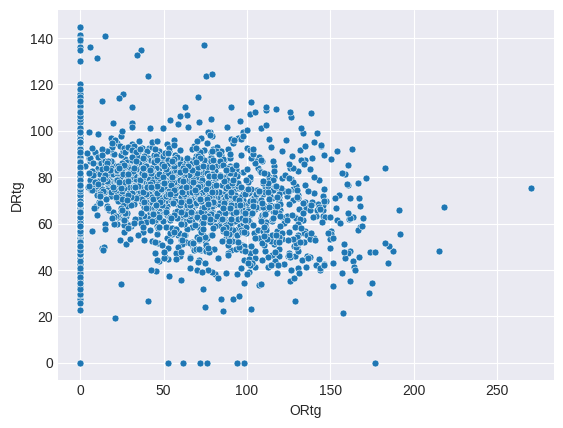

In [ ]:
sns.scatterplot(data=athlete_summary_filtered, x='ORtg', y='DRtg', palette='coolwarm', s=25)

In [ ]:
results_df_final.to_csv('results_def.csv')
results_df = pd.read_csv('/content/results_def.csv')

In [ ]:
results_df_sorted = results_df.sort_values(by='DRtg', ascending=True)
print(results_df_sorted.head())

      Unnamed: 0               Athlete         ORtg  DRtg
2955        2955  Xanthippi Karatasiou     0.000000  -inf
2430        2430            Racky Kane     0.000000  -inf
1634        1634        Khadijah Tungo     0.000000  -inf
97            97   Alejandra Ferreiros    74.606367  -inf
2426        2426           Rachel Kuhl  3798.901475  -inf


In [ ]:
results_df_sorted = results_df.sort_values(by='DRtg', ascending=False)
print(results_df_sorted.head())

      Unnamed: 0            Athlete         ORtg         DRtg
1979        1979  Makayla Firebaugh  6292.897913  9815.020326
1343        1343  Jessica Tomasetti  6467.031099  9353.422569
2511        2511      Sajada Bonner  6640.393048  9217.135396
2525        2525    Samantha Bailey  3074.873372  8834.850248
1300        1300     Jayme DeCesare  6829.410283  8706.481565


In [ ]:
import pandas as pd
athlete_summary_filtered = pd.read_csv('/content/results_def.csv')

In [ ]:
athlete = pd.read_csv('/content/Athlete_Summary.csv')

In [ ]:
merged_df = pd.merge(athlete_summary_filtered,athlete[['Athlete', 'Matches Played']], left_on='Athlete', right_on='Athlete', how='left')


In [ ]:
merged_df['ORtg'] = merged_df['ORtg'] / merged_df['Matches Played']
merged_df['DRtg'] = merged_df['DRtg'] / merged_df['Matches Played']
merged_df.head()

,Unnamed: 0,Athlete,ORtg,DRtg,Matches Played
0,0,A'Jah Davis,0.000000,50.525287,3
1,1,A'Moni Waiters,0.000000,0.000000,1
2,2,A'Riana Gray,0.000000,44.991805,1
3,3,A'riel Jackson,75.773853,68.661032,1
4,4,AJ Marotte,91.440134,75.770829,1


In [ ]:
merged_df.to_csv('results_final.csv')

In [ ]:
results_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

In [ ]:
print(np.isinf(df[['ORtg', 'DRtg']]).sum())

ORtg    0
DRtg    0
dtype: int64


In [ ]:
results_df = results_df.dropna()

In [ ]:
df_clean = df[df['ORtg'].isnull() == False]
df_clean = df[df['DRtg'].isna() == False]

In [ ]:
len(df_clean)


12485

In [ ]:
len(df)

12485

In [ ]:
df.columns

Index(['Team Display Name', 'Athlete', 'Date', 'Opponet', 'PTS', 'MIN', 'FGM',
       'FGA', 'PM', 'PA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'BLK',
       'STL', 'TO', 'PF', 'Team Score', 'Win', 'Game Score'],
      dtype='object')

In [ ]:
import numpy as np

# Check for inf values
print("inf in ORtg:", np.isinf(df['ORtg']).sum())
print("inf in DRtg:", np.isinf(df['DRtg']).sum())

# Check for very large values
print("max ORtg:", df['ORtg'].max())
print("max DRtg:", df['DRtg'].max())

inf in ORtg: 0
inf in DRtg: 0
max ORtg: 8436.827971517076
max DRtg: 9815.020325785028


In [ ]:
df['Player_Type_Num'] = df['Player_Type_Num'].fillna(0)
print(df[['Player_Type_Num']].isnull().sum())  # Should print 0

KeyError: 'Player_Type_Num'

<ipython-input-77-2164b2d8693b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(df, x='ORtg', y='DRtg', palette='coolwarm', s=50)


<Axes: xlabel='ORtg', ylabel='DRtg'>

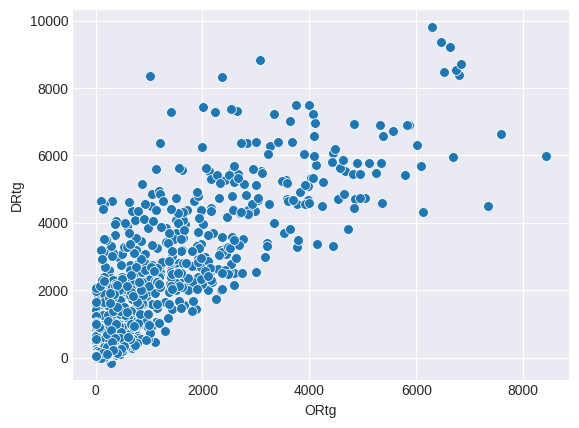

In [ ]:
import seaborn as sns
sns.scatterplot(df, x='ORtg', y='DRtg', palette='coolwarm', s=50)

Centroids:
 [[ 0.33246241  0.69976653]
 [-0.56598142 -0.63752302]
 [ 2.00027763  1.59685162]]
Cluster Distribution:
Player_Type
Neutral     269
Defender    115
Attacker     57
Name: count, dtype: int64


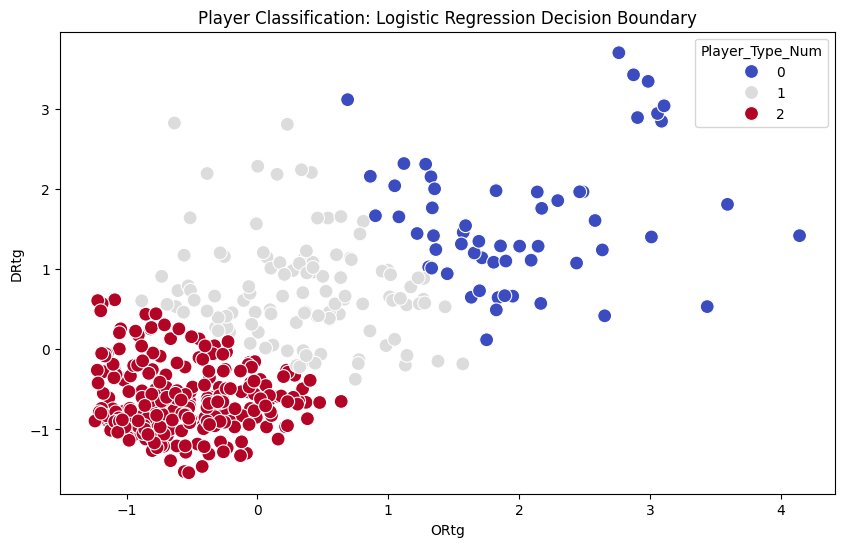

Logistic Regression Accuracy: 0.99

Confusion Matrix:
[[ 8  0  0]
 [ 0 27  1]
 [ 0  0 53]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.96      0.98        28
           2       0.98      1.00      0.99        53

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Assuming df is already loaded as athlete_summary_filtered
df = athlete_summary_filtered.copy()

# Clean data
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Scale ORtg and DRtg
scaler = StandardScaler()
df[['ORtg', 'DRtg']] = scaler.fit_transform(df[['ORtg', 'DRtg']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['ORtg', 'DRtg']])

# Analyze centroids
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

# Assign clusters based on centroid values
clusters = set([0, 1, 2])
attacker_cluster = np.argmax(centroids[:, 0])  # Highest ORtg
defender_cluster = np.argmax(centroids[:, 1])  # Highest DRtg

# Resolve conflict if both are the same
if attacker_cluster == defender_cluster:
    second_best_def = np.argsort(centroids[:, 1])[-2]
    defender_cluster = second_best_def

neutral_cluster = list(clusters - set([attacker_cluster, defender_cluster]))[0]

# Map cluster to player type
mapping = {
    attacker_cluster: 'Attacker',
    defender_cluster: 'Defender',
    neutral_cluster: 'Neutral'
}
df['Player_Type'] = df['Cluster'].map(mapping)

# Remove any rows where mapping failed (just in case)
df.dropna(subset=['Player_Type'], inplace=True)

# Map to numeric
df['Player_Type_Num'] = df['Player_Type'].map({'Attacker': 0, 'Defender': 1, 'Neutral': 2})

# Check distribution
print("Cluster Distribution:")
print(df['Player_Type'].value_counts())

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ORtg', y='DRtg', hue='Player_Type_Num', palette='coolwarm', s=100)
plt.title('Player Classification: Logistic Regression Decision Boundary')
plt.xlabel('ORtg')
plt.ylabel('DRtg')
plt.show()

# Prepare data for logistic regression
X = df[['ORtg', 'DRtg']]
y = df['Player_Type_Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}\n')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load player ratings from results_df
results_df = pd.read_csv('results_final.csv')  # Assuming the processed file with ratings
# Load match data
df = pd.read_excel('9.xlsx')  # Original dataset

def merge_player_ratings(df, results_df):
    df = df.merge(results_df[['Athlete', 'ORtg', 'DRtg']],
                  left_on='Athlete', right_on='Athlete', how='left')
    return df

df = merge_player_ratings(df, results_df)

df_filtered = df[df['MIN'] >= 5].copy()

df_filtered['Win'] = df_filtered['Win'].astype(int)  # Convert boolean to 0/1
print(df_filtered.head())
# Count number of players per team per match
player_counts = df_filtered.groupby(['Date', 'Team Display Name'])['Athlete'].count().reset_index()
player_counts.rename(columns={'Athlete': 'Num_Players'}, inplace=True)

# Aggregate team-level scores
team_data = df_filtered.groupby(['Date', 'Team Display Name']).agg(
    Team_Offensive_Score=('ORtg', 'sum'),
    Team_Defensive_Score=('DRtg', 'sum'),
    Team_Game_Score=('Game Score', 'sum'),
    Win=('Win', 'first')
).reset_index()

# Merge player count data
team_data = team_data.merge(player_counts, on=['Date', 'Team Display Name'])

# Normalize team scores by number of players
team_data['Team_Offensive_Score'] /= team_data['Num_Players']
team_data['Team_Defensive_Score'] /= team_data['Num_Players']
team_data['Team_Game_Score'] /= team_data['Num_Players']

# Get opponent info
df_opponents = df_filtered[['Date', 'Team Display Name', 'Opponet']].drop_duplicates()
team_df = team_data.merge(df_opponents, on=['Date', 'Team Display Name'])

# Merge opponent scores
team_df = team_df.merge(team_data, left_on=['Date', 'Opponet'],
                         right_on=['Date', 'Team Display Name'], suffixes=('', '_Opp'))
team_df = team_df[['Date', 'Team Display Name', 'Opponet', 'Team_Offensive_Score', 'Team_Defensive_Score',
                   'Team_Game_Score', 'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp',
                   'Team_Game_Score_Opp', 'Win']]
team_df.replace([np.inf, -np.inf], np.nan, inplace=True)
team_df.dropna(inplace=True)

# Prepare features and labels
X = team_df[['Team_Offensive_Score', 'Team_Defensive_Score', 'Team_Game_Score',
             'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp', 'Team_Game_Score_Opp']]
y = team_df['Win']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = (y_pred_binary == y_test).mean()

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Prediction Accuracy: {accuracy:.4f}")

# Print model weights
print("\nModel Weights:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Save results
team_df.to_csv('team_match_data.csv', index=False)

   Team Display Name           Athlete       Date             Opponet  PTS  \
0  Providence Friars      Alyssa Geary 2020-11-25  Quinnipiac Bobcats   17   
1  Providence Friars  Mary Baskerville 2020-11-25  Quinnipiac Bobcats   15   
2  Providence Friars    Olivia Orlando 2020-11-25  Quinnipiac Bobcats    5   
3  Providence Friars       Kyra Spiwak 2020-11-25  Quinnipiac Bobcats   14   
4  Providence Friars  Chanell Williams 2020-11-25  Quinnipiac Bobcats    8   

   MIN  FGM  FGA  PM  PA  ...  AST  BLK  STL  TO  PF  Team Score  Win  \
0   38    7   17   0   2  ...    4    3    1   4   5          65    0   
1   15    7   12   0   0  ...    2    1    1   2   4          65    0   
2   38    1    4   0   0  ...    0    0    2   1   2          65    0   
3   36    4   11   2   8  ...    3    0    0   0   1          65    0   
4   26    2    7   0   0  ...    3    0    0   2   3          65    0   

   Game Score        ORtg       DRtg  
0         9.7  111.440943  66.616781  
1        10.4 

Linear Regression : Game score, ortg, drtg

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load player ratings from results_df
results_df = pd.read_csv('results_final.csv')  # Assuming the processed file with ratings

# Load match data
df = pd.read_excel('9.xlsx')  # Original dataset

def merge_player_ratings(df, results_df):
    df = df.merge(results_df[['Athlete', 'ORtg', 'DRtg']],
                  left_on='Athlete', right_on='Athlete', how='left')
    return df

df = merge_player_ratings(df, results_df)

df_filtered = df[df['MIN'] >= 5].copy()

df_filtered['Win'] = df_filtered['Win'].astype(int)  # Convert boolean to 0/1

# Count number of players per team per match
player_counts = df_filtered.groupby(['Date', 'Team Display Name'])['Athlete'].count().reset_index()
player_counts.rename(columns={'Athlete': 'Num_Players'}, inplace=True)

# Aggregate team-level scores
team_data = df_filtered.groupby(['Date', 'Team Display Name']).agg(
    Team_Offensive_Score=('ORtg', 'sum'),
    Team_Defensive_Score=('DRtg', 'sum'),
    Win=('Win', 'first')
).reset_index()

# Merge player count data
team_data = team_data.merge(player_counts, on=['Date', 'Team Display Name'])

# Normalize team scores by number of players
team_data['Team_Offensive_Score'] /= team_data['Num_Players']
team_data['Team_Defensive_Score'] /= team_data['Num_Players']

# Get opponent info
df_opponents = df_filtered[['Date', 'Team Display Name', 'Opponet']].drop_duplicates()
team_df = team_data.merge(df_opponents, on=['Date', 'Team Display Name'])

# Merge opponent scores
team_df = team_df.merge(team_data, left_on=['Date', 'Opponet'],
                         right_on=['Date', 'Team Display Name'], suffixes=('', '_Opp'))
team_df = team_df[['Date', 'Team Display Name', 'Opponet', 'Team_Offensive_Score', 'Team_Defensive_Score',
                   'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp', 'Win']]

team_df.replace([np.inf, -np.inf], np.nan, inplace=True)
team_df.dropna(inplace=True)
# Prepare features and labels
X = team_df[['Team_Offensive_Score', 'Team_Defensive_Score', 'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp']]
y = team_df['Win']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = (y_pred_binary == y_test).mean()

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Prediction Accuracy: {accuracy:.4f}")

print("\nModel Weights:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Save results
team_df.to_csv('team_match_data.csv', index=False)


Model Performance:
Mean Squared Error: 0.1761
R-squared Score: 0.2903
Prediction Accuracy: 0.7424

Model Weights:
Team_Offensive_Score: 0.0061
Team_Defensive_Score: -0.0155
Team_Offensive_Score_Opp: -0.0057
Team_Defensive_Score_Opp: 0.0184
Intercept: 0.2619


Linear Regression :

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load player ratings from results_df
results_df = pd.read_csv('results_final.csv')  # Assuming the processed file with ratings

# Load match data
df = pd.read_excel('9.xlsx')  # Original dataset

def merge_player_ratings(df, results_df):
    df = df.merge(results_df[['Athlete', 'ORtg', 'DRtg']],
                  left_on='Athlete', right_on='Athlete', how='left')
    return df

df = merge_player_ratings(df, results_df)

df_filtered = df[df['MIN'] >= 5].copy()

df_filtered['Win'] = df_filtered['Win'].astype(int)  # Convert boolean to 0/1

# Count number of players per team per match
player_counts = df_filtered.groupby(['Date', 'Team Display Name'])['Athlete'].count().reset_index()
player_counts.rename(columns={'Athlete': 'Num_Players'}, inplace=True)

# Aggregate team-level scores
team_data = df_filtered.groupby(['Date', 'Team Display Name']).agg(
    Team_Game_Score=('Game Score', 'sum'),
    Win=('Win', 'first')
).reset_index()

# Merge player count data
team_data = team_data.merge(player_counts, on=['Date', 'Team Display Name'])

team_data['Team_Game_Score'] /= team_data['Num_Players']

# Get opponent info
df_opponents = df_filtered[['Date', 'Team Display Name', 'Opponet']].drop_duplicates()
team_df = team_data.merge(df_opponents, on=['Date', 'Team Display Name'])

# Merge opponent scores
team_df = team_df.merge(team_data, left_on=['Date', 'Opponet'],
                         right_on=['Date', 'Team Display Name'], suffixes=('', '_Opp'))
team_df = team_df[['Date', 'Team Display Name', 'Opponet',
                   'Team_Game_Score',
                   'Team_Game_Score_Opp', 'Win']]

team_df.replace([np.inf, -np.inf], np.nan, inplace=True)
team_df.dropna(inplace=True)
# Prepare features and labels
X = team_df[['Team_Game_Score',
            'Team_Game_Score_Opp']]
y = team_df['Win']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = (y_pred_binary == y_test).mean()

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Prediction Accuracy: {accuracy:.4f}")

# Print model weights
print("\nModel Weights:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Save results
team_df.to_csv('team_match_data.csv', index=False)


Model Performance:
Mean Squared Error: 0.0973
R-squared Score: 0.6109
Prediction Accuracy: 0.9272

Model Weights:
Team_Game_Score: 0.1091
Team_Game_Score_Opp: -0.1079
Intercept: 0.4955


In [ ]:
print(results_df.columns)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

results_df = pd.read_csv('results_final.csv')  # Assuming the processed file with ratings

# Load match data
df = pd.read_excel('9.xlsx')  # Original dataset

def merge_player_ratings(df, results_df):
    df = df.merge(results_df[['Athlete', 'ORtg', 'DRtg']],
                  left_on='Athlete', right_on='Athlete', how='left')
    return df

df = merge_player_ratings(df, results_df)

df_filtered = df[df['MIN'] >= 5].copy()

df_filtered['Win'] = df_filtered['Win'].astype(int)  # Convert boolean to 0/1

# Count number of players per team per match
player_counts = df_filtered.groupby(['Date', 'Team Display Name'])['Athlete'].count().reset_index()
player_counts.rename(columns={'Athlete': 'Num_Players'}, inplace=True)

# Aggregate team-level scores
team_data = df_filtered.groupby(['Date', 'Team Display Name']).agg(
    Team_Offensive_Score=('ORtg', 'sum'),
    Team_Defensive_Score=('DRtg', 'sum'),
    Team_Game_Score=('Game Score', 'sum'),
    Win=('Win', 'first')
).reset_index()

# Merge player count data
team_data = team_data.merge(player_counts, on=['Date', 'Team Display Name'])

# Normalize team scores by number of players
team_data['Team_Offensive_Score'] /= team_data['Num_Players']
team_data['Team_Defensive_Score'] /= team_data['Num_Players']
team_data['Team_Game_Score'] /= team_data['Num_Players']

# Get opponent info
df_opponents = df_filtered[['Date', 'Team Display Name', 'Opponet']].drop_duplicates()
team_df = team_data.merge(df_opponents, on=['Date', 'Team Display Name'])

# Merge opponent scores
team_df = team_df.merge(team_data, left_on=['Date', 'Opponet'],
                         right_on=['Date', 'Team Display Name'], suffixes=('', '_Opp'))
team_df = team_df[['Date', 'Team Display Name', 'Opponet', 'Team_Offensive_Score', 'Team_Defensive_Score',
                   'Team_Game_Score', 'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp',
                   'Team_Game_Score_Opp', 'Win']]

team_df.replace([np.inf, -np.inf], np.nan, inplace=True)
team_df.dropna(inplace=True)
# Prepare features and labels
X = team_df[['Team_Offensive_Score', 'Team_Defensive_Score', 'Team_Game_Score',
             'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp', 'Team_Game_Score_Opp']]
y = team_df['Win']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Train and evaluate XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Save results
team_df.to_csv('team_match_data.csv', index=False)

Logistic Regression Accuracy: 0.9242
Random Forest Accuracy: 0.9141
XGBoost Accuracy: 0.9268


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Load player ratings from results_df
results_df = pd.read_csv('results_final.csv')  # Assuming the processed file with ratings

# Load match data
df = pd.read_excel('9.xlsx')  # Original dataset

def merge_player_ratings(df, results_df):
    df = df.merge(results_df[['Athlete', 'ORtg', 'DRtg']],
                  left_on='Athlete', right_on='Athlete', how='left')
    return df

df = merge_player_ratings(df, results_df)

df_filtered = df[df['MIN'] >= 5].copy()

df_filtered['Win'] = df_filtered['Win'].astype(int)  # Convert boolean to 0/1

# Count number of players per team per match
player_counts = df_filtered.groupby(['Date', 'Team Display Name'])['Athlete'].count().reset_index()
player_counts.rename(columns={'Athlete': 'Num_Players'}, inplace=True)

# Aggregate team-level scores
team_data = df_filtered.groupby(['Date', 'Team Display Name']).agg(
    Team_Game_Score=('Game Score', 'sum'),
    Win=('Win', 'first')
).reset_index()

# Merge player count data
team_data = team_data.merge(player_counts, on=['Date', 'Team Display Name'])

team_data['Team_Game_Score'] /= team_data['Num_Players']

# Get opponent info
df_opponents = df_filtered[['Date', 'Team Display Name', 'Opponet']].drop_duplicates()
team_df = team_data.merge(df_opponents, on=['Date', 'Team Display Name'])

# Merge opponent scores
team_df = team_df.merge(team_data, left_on=['Date', 'Opponet'],
                         right_on=['Date', 'Team Display Name'], suffixes=('', '_Opp'))
team_df = team_df[['Date', 'Team Display Name', 'Opponet',
                   'Team_Game_Score',
                   'Team_Game_Score_Opp', 'Win']]

team_df.replace([np.inf, -np.inf], np.nan, inplace=True)
team_df.dropna(inplace=True)
# Prepare features and labels
X = team_df[['Team_Game_Score',
            'Team_Game_Score_Opp']]
y = team_df['Win']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Train and evaluate XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Save results
team_df.to_csv('team_match_data.csv', index=False)

Logistic Regression Accuracy: 0.9272
Random Forest Accuracy: 0.8988
XGBoost Accuracy: 0.8988


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
results_df = pd.read_csv('results_final.csv')  # Assuming the processed file with ratings

# Load match data
df = pd.read_excel('9.xlsx')  # Original dataset

def merge_player_ratings(df, results_df):
    df = df.merge(results_df[['Athlete', 'ORtg', 'DRtg']],
                  left_on='Athlete', right_on='Athlete', how='left')
    return df

df = merge_player_ratings(df, results_df)

df_filtered = df[df['MIN'] >= 5].copy()

df_filtered['Win'] = df_filtered['Win'].astype(int)  # Convert boolean to 0/1

# Count number of players per team per match
player_counts = df_filtered.groupby(['Date', 'Team Display Name'])['Athlete'].count().reset_index()
player_counts.rename(columns={'Athlete': 'Num_Players'}, inplace=True)

# Aggregate team-level scores
team_data = df_filtered.groupby(['Date', 'Team Display Name']).agg(
    Team_Offensive_Score=('ORtg', 'sum'),
    Team_Defensive_Score=('DRtg', 'sum'),
    Win=('Win', 'first')
).reset_index()

# Merge player count data
team_data = team_data.merge(player_counts, on=['Date', 'Team Display Name'])

# Normalize team scores by number of players
team_data['Team_Offensive_Score'] /= team_data['Num_Players']
team_data['Team_Defensive_Score'] /= team_data['Num_Players']

# Get opponent info
df_opponents = df_filtered[['Date', 'Team Display Name', 'Opponet']].drop_duplicates()
team_df = team_data.merge(df_opponents, on=['Date', 'Team Display Name'])

# Merge opponent scores
team_df = team_df.merge(team_data, left_on=['Date', 'Opponet'],
                         right_on=['Date', 'Team Display Name'], suffixes=('', '_Opp'))
team_df = team_df[['Date', 'Team Display Name', 'Opponet', 'Team_Offensive_Score', 'Team_Defensive_Score',
                   'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp', 'Win']]

team_df.replace([np.inf, -np.inf], np.nan, inplace=True)
team_df.dropna(inplace=True)
# Prepare features and labels
X = team_df[['Team_Offensive_Score', 'Team_Defensive_Score', 'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp']]
y = team_df['Win']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Train and evaluate XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Save results
team_df.to_csv('team_match_data.csv', index=False)

Logistic Regression Accuracy: 0.7500
Random Forest Accuracy: 0.6995
XGBoost Accuracy: 0.7197


In [ ]:
len(X)

In [ ]:
test_df = pd.read_csv('/content/test_data_updated.csv')

X_test = test_df[['Team_Offensive_Score', 'Team_Defensive_Score', 'Team_Game_Score',
             'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp', 'Team_Game_Score_Opp']]
y_test = test_df['Win']

predictions = model.predict(X_test)
binary_predictions = (predictions > 1).astype(int)

print("\nTest Data Predictions:")
for i in range(len(test_df)):
    print(f"Match: {test_df['Team'][i]} vs {test_df['Opponent'][i]}")
    print(f"Predicted Win Probability: {predictions[i]:.3f}")
    print(f"Predicted Outcome: {'Win' if binary_predictions[i] == 1 else 'Loss'}")
    print(f"Actual Outcome: {'Win' if y_test[i] == 1 else 'Loss'}")
    print("---")

test_accuracy = (binary_predictions == y_test).mean()
print(f"\nTest Data Accuracy: {test_accuracy:.4f}")

In [ ]:
test_df = pd.read_csv('/content/test_data.csv')

test_df = test_df.rename(columns={
    'Opp_Offensive_Score': 'Team_Offensive_Score_Opp',
    'Opp_Defensive_Score': 'Team_Defensive_Score_Opp',
})

X_test = test_df[['Team_Offensive_Score', 'Team_Defensive_Score',
                 'Team_Offensive_Score_Opp', 'Team_Defensive_Score_Opp']]
y_test = test_df['Win']

predictions = model.predict(X_test)
binary_predictions = (predictions > 0.51).astype(int)


print("\nTest Data Predictions:")
for i in range(len(test_df)):
    print(f"Match: {test_df['Team'][i]} vs {test_df['Opponent'][i]}")
    print(f"Predicted Win Probability: {predictions[i]:.3f}")
    print(f"Predicted Outcome: {'Win' if binary_predictions[i] == 1 else 'Loss'}")
    print(f"Actual Outcome: {'Win' if y_test[i] == 1 else 'Loss'}")
    print("---")

test_accuracy = (binary_predictions == y_test).mean()
print(f"\nTest Data Accuracy: {test_accuracy:.4f}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/test_data.csv'